In [1]:
%load_ext autoreload
%autoreload 2
from potentials import ParameterizedPotential
import utils
import matplotlib.pyplot as plt
import numpy as np
from ase import Atoms
from gpaw import GPAW,PW
from gpaw.utilities.ps2ae import PS2AE
from utils import kappa

In [114]:
Z = 1
vacuum = 3

atoms = Atoms([Z], [(0, 0, 0)], pbc=True)
atoms.center(vacuum=vacuum)

calc = GPAW(mode=PW(600), hund=True, eigensolver = 'cg', h=.1)
atoms.set_calculator(calc)

atoms.get_potential_energy()


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  1.4.0
 |___|_|             

User:   jacob@Jacob-PC
Date:   Tue Oct  9 16:36:19 2018
Arch:   x86_64
Pid:    64
Python: 3.5.2
gpaw:   /home/jacob/.local/lib/python3.5/site-packages/gpaw
_gpaw:  /home/jacob/.local/lib/python3.5/site-packages/
        _gpaw.cpython-35m-x86_64-linux-gnu.so
ase:    /home/jacob/.local/lib/python3.5/site-packages/ase (version 3.16.2)
numpy:  /home/jacob/.local/lib/python3.5/site-packages/numpy (version 1.15.2)
scipy:  /home/jacob/.local/lib/python3.5/site-packages/scipy (version 1.1.0)
units:  Angstrom and eV
cores:  1

Input parameters:
  eigensolver: cg
  h: 0.1
  hund: True
  mode: {ecut: 600.0,
         name: pw}

System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

H-setup:
  name: Hydrogen
  id: 4766778ce56282eaa64abeb28b7c1de3
  Z: 1
  valence: 1
  core: 0
  charge: 0.0
  file: /usr/share/gpaw-setups/H.LDA.gz
  cutoffs: 

-0.922564585450138

In [115]:
h=.02
ps2ae = PS2AE(atoms.calc, h=h)
v_dft = -ps2ae.get_electrostatic_potential(ae=True)

nx, ny, nz = v_dft.shape
v_dft = np.roll(np.roll(np.roll(v_dft, nx//2, 0), ny//2, 1), nz//2, 2)

r = np.linspace(1e-12, 2*vacuum, nx, endpoint = False)

Timing:                              incl.     excl.
-----------------------------------------------------------
Hamiltonian:                         0.203     0.002   0.0% |
 Atomic:                             0.012     0.001   0.0% |
  XC Correction:                     0.011     0.011   0.0% |
 Calculate atomic Hamiltonians:      0.023     0.023   0.0% |
 Communicate:                        0.000     0.000   0.0% |
 Initialize Hamiltonian:             0.000     0.000   0.0% |
 Poisson:                            0.001     0.001   0.0% |
 XC 3D grid:                         0.165     0.165   0.2% |
LCAO initialization:                 0.052     0.004   0.0% |
 LCAO eigensolver:                   0.029     0.000   0.0% |
  Calculate projections:             0.000     0.000   0.0% |
  DenseAtomicCorrection:             0.000     0.000   0.0% |
  Distribute overlap matrix:         0.000     0.000   0.0% |
  Orbital Layouts:                   0.000     0.000   0.0% |
  Potential matrix:

(-5, 5)

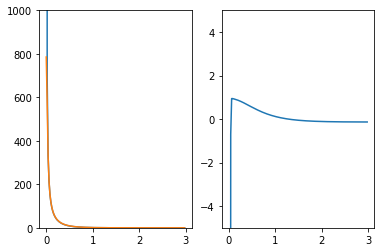

In [116]:
v_lobato = ParameterizedPotential('lobato').potential(Z)
fig,(ax1,ax2) = plt.subplots(1,2)

ax1.plot(r[:nx//2], v_lobato(r[:nx//2]) / kappa, label='Lobato')
ax1.plot(r[:nx//2], v_dft[:nx//2,0,0])
ax1.set_ylim([0, 1000])

ax2.plot(r[:nx//2], v_dft[:nx//2,0,0] - v_lobato(r[:nx//2]) / kappa)
ax2.set_ylim([-5, 5])

## Scattering factor

In [117]:
f_dft = np.fft.fftn(v_dft).real / (np.prod(v_dft.shape) / atoms.get_volume()) * kappa

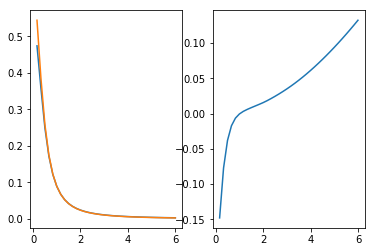

In [118]:
g = np.fft.fftfreq(nx) / (2 * vacuum / nx)

f_lobato = ParameterizedPotential('lobato').scattering_factor(Z)

fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(g[1:nx//8], f_lobato(g[1:nx//8]), label='Lobato')
ax1.plot(g[1:nx//8], f_dft[1:nx//8,0,0])

ax2.plot(g[1:nx//8], (f_lobato(g[1:nx//8]) - f_dft[1:nx//8,0,0])/f_lobato(g[1:nx//8]))